In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import lambertw
from mpl_toolkits import mplot3d
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

[18]
18


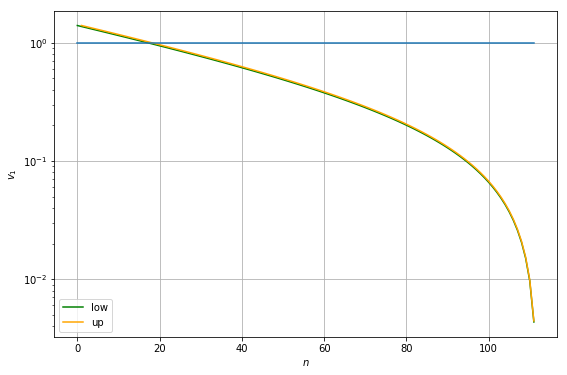

In [2]:
# some givens
slack_eps = 1
N = 300
C0 = 1
v = 0.98

n = np.arange(N)
n_bis = np.arange(1,N)
k = np.arange(N)

C_1 = (slack_eps-C0*(v**(N-n)-v**N)/(1-v))/(N-n)
v_1 = C_1*(C0*v**(N-1-k))**(-1)
v_1_bis = C_1[1:]*(C0*v**(N-n_bis))**(-1)
indices_1 = n[v_1>0]
ok_indices_1 = k[(v_1<=1) & (v_1>0)]
indices_1_bis = n_bis[v_1_bis>0]
ok_indices_1_bis = n_bis[(v_1_bis>1)]


print(np.intersect1d(ok_indices_1,ok_indices_1_bis))
print(ok_indices_1[0])
plt.figure(figsize=(9,6))
plt.grid()
plt.xlabel('$n$')
plt.ylabel('$v_1$')
plt.semilogy(indices_1,v_1[v_1>0],color='green')
plt.semilogy(indices_1_bis,v_1_bis[v_1_bis>0],color='orange')
plt.semilogy(indices_1,np.ones(len(indices_1)))
plt.legend(['low','up']);

In [3]:
# fun num
def Nb_num(slack_eps,N=250,v=0.98,C0=1):
    n = np.arange(N)
    n_bis = np.arange(1,N)
    k = np.arange(N)
    C_1 = (slack_eps-C0*(v**(N-n)-v**N)/(1-v))/(N-n)
    v_1 = C_1*(C0*v**(N-1-k))**(-1)
    ok_indices_1 = k[(v_1<=1) & (v_1>0)]
    if len(ok_indices_1) > 0:
        return ok_indices_1[0]
    else:
        return N

def Nb_try(slack_eps,N=250,v=0.98,C0=1):
    n = np.arange(N)
    arg_lhs = (1-v)/C0*slack_eps + v**N
    arg_rhs = v**(N-n)*(1+(N-n)*(1-v)/v)
    ok_indices_1 = n[arg_rhs>=arg_lhs]
    if len(ok_indices_1) > 0:
        return ok_indices_1[0]
    else:
        return N
    
# fun analytical
def Nb_ana(slack_eps,N=250,v=0.98,C0=1):
    arg_lambert_w0 = ((1-v)/C0*slack_eps + v**N)*v**(1/(1-v))*(np.log(v)/(1-v))
    print(-1/np.exp(1))
    print(arg_lambert_w0)
    val_lambert_w0 = np.real(lambertw(arg_lambert_w0,k=0))
    print(val_lambert_w0)
    return np.ceil(N-val_lambert_w0/np.log(v)+(v/(1-v)))

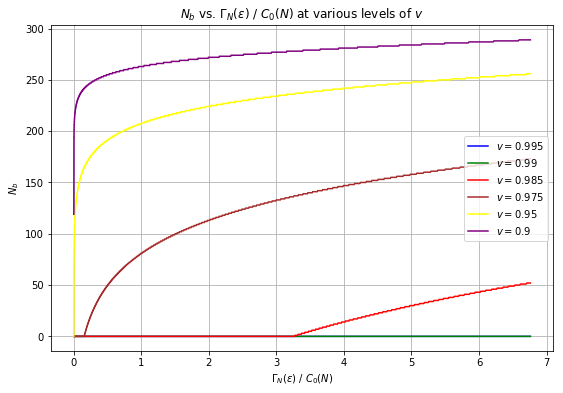

In [11]:
N = 300
C0 = 10
vector2 = np.logspace(-5,1.83,10000)/C0

plt.figure(figsize=(9,6))

plt.grid()
plt.title('$N_b$ vs. $\Gamma_N(\epsilon)$ / $C_0(N)$ at various levels of $v$')

v = 0.995

vals = np.array([np.ceil(N-np.real(lambertw(((1-v)*stack_elem + v**N)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) for stack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='blue');

v = 0.99

vals = np.array([np.ceil(N-np.real(lambertw(((1-v)*stack_elem + v**N)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) for stack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='green');

v = 0.985

vals = np.array([np.ceil(N-np.real(lambertw(((1-v)*stack_elem + v**N)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) for stack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='red');

v = 0.975
vals = np.array([np.ceil(N-np.real(lambertw(((1-v)*stack_elem + v**N)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) for stack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='brown');

v = 0.95
vals = np.array([np.ceil(N-np.real(lambertw(((1-v)*stack_elem + v**N)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) for stack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='yellow');

v = 0.9
vals = np.array([np.ceil(N-np.real(lambertw(((1-v)*stack_elem + v**N)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) for stack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='purple');

plt.legend(['$v = 0.995$','$v = 0.99$','$v = 0.985$','$v =0.975$','$v =0.95$','$v =0.9$'])
plt.xlabel('$\Gamma_N(\epsilon)$ / $C_0(N)$')
plt.ylabel('$N_b$');
plt.savefig('Nb11.pdf')

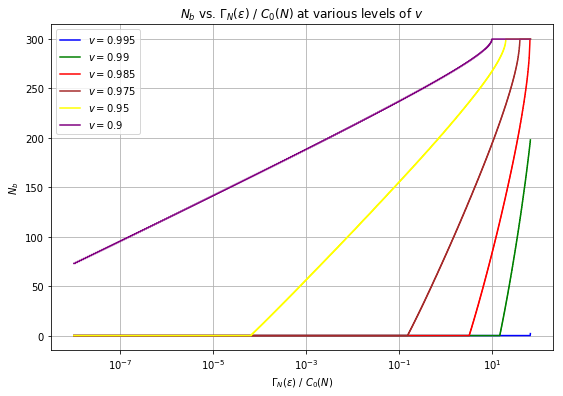

In [12]:
N = 300
C0 = 1
vector2 = np.logspace(-8,1.83,10000)/C0

plt.figure(figsize=(9,6))

plt.grid()
plt.title('$N_b$ vs. $\Gamma_N(\epsilon)$ / $C_0(N)$ at various levels of $v$')

v = 0.995

vals = np.array([np.ceil(N-np.real(lambertw(((1-v)*slack_elem + v**N)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='blue');

v = 0.99

vals = np.array([np.ceil(N-np.real(lambertw(((1-v)*slack_elem + v**N)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='green');

v = 0.985

vals = np.array([np.ceil(N-np.real(lambertw(((1-v)*slack_elem + v**N)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='red');

v = 0.975
vals = np.array([np.ceil(N-np.real(lambertw(((1-v)*slack_elem + v**N)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='brown');

v = 0.95
vals = np.array([np.ceil(N-np.real(lambertw(((1-v)*slack_elem + v**N)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='yellow');

v = 0.9
vals = np.array([np.ceil(N-np.real(lambertw(((1-v)*slack_elem + v**N)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='purple');

plt.legend(['$v = 0.995$','$v = 0.99$','$v = 0.985$','$v =0.975$','$v =0.95$','$v =0.9$'])
plt.xlabel('$\Gamma_N(\epsilon)$ / $C_0(N)$')
plt.ylabel('$N_b$');
plt.savefig('Nb11_log.pdf')

In [6]:
N = 300
v_vec = np.linspace(0.8,0.995,20)
slack_eps_vec = np.logspace(-8,1.83,1000)

v_grid,slack_eps_grid = np.meshgrid(v_vec, slack_eps_vec)

Nb_grid = np.zeros(v_grid.shape)

for elem_slack_eps in np.arange(len(slack_eps_vec)):
    for elem_v in np.arange(len(v_vec)):
        slack_eps_prop,v_prop = slack_eps_grid[elem_slack_eps][elem_v],v_grid[elem_slack_eps][elem_v]
        Nb_proposal = np.ceil(N-np.real(lambertw(((1-v_prop)/C0*slack_eps_prop + v_prop**N)\
             *v_prop**(1/(1-v_prop))*(np.log(v_prop)/(1-v_prop)),-1))/np.log(v_prop)+v_prop/(1-v_prop))
        Nb_grid[elem_slack_eps][elem_v] = np.max((0,np.min((N,Nb_proposal))))

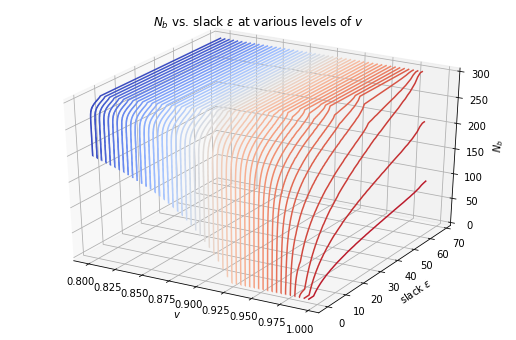

In [7]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.contour(v_grid,slack_eps_grid,Nb_grid, 50,zdir='x',cmap=cm.coolwarm)
ax.set_title('$N_b$ vs. slack $\epsilon$ at various levels of $v$');
ax.set_xlabel('$v$')
ax.set_ylabel('slack $\epsilon$')
ax.set_zlabel('$N_b$');

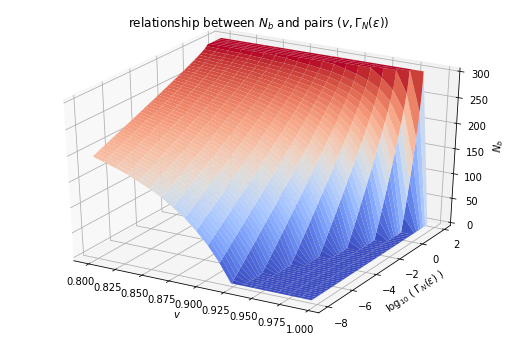

In [8]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.plot_surface(v_grid,np.log10(slack_eps_grid),Nb_grid,cmap=cm.coolwarm)
ax.set_title('relationship between $N_b$ and pairs ($v,\Gamma_N(\epsilon)$)');
ax.set_xlabel('$v$')
ax.set_ylabel('$\log_{10}$ ( $\Gamma_N(\epsilon)$ )')
ax.set_zlabel('$N_b$');
plt.savefig('3DNb11_log.pdf')

2159
1.995406258463875e-05
slack at 1500 | val = 0
0
best GD: 33282.7974592407 at 2317
best GD constant: 40763.27909717695
 
q-measure: 7480.481637936253
relative q-measure: 18.351030151679602 %
 
237
9.283340275220439e-08
slack at 200 | val = 0
321
best FGD: 3652.8043252213993 at 256
best FGD constant: 5069.210916013901
 
q-measure: 1416.4065907925014
relative q-measure: 27.941362359139553 %
 


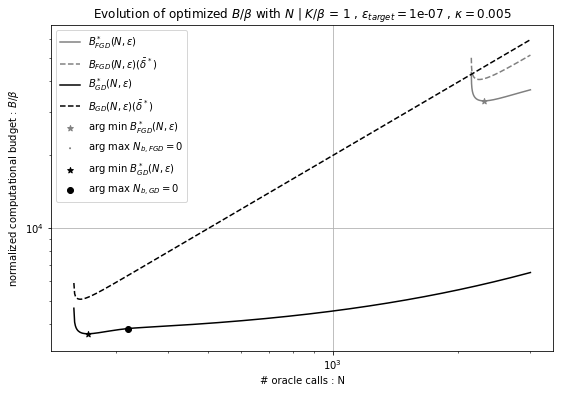

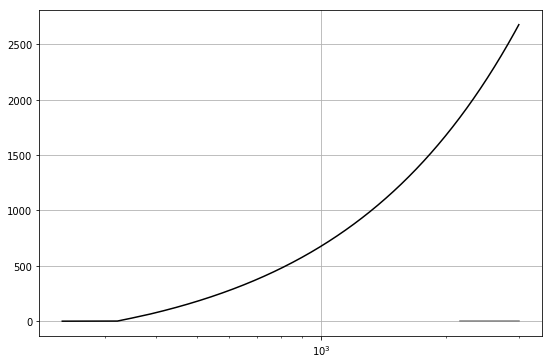

In [9]:
kappa = 0.005
K_div_beta = 1
N_max = 3000 # should be infinity 
multi = 1
eps_target = 1e-7

plt.figure(figsize=(9,6))

plt.grid()

vector_N_attempt = np.arange(N_max)+1

N_echantillon = int(N_max/2)
echantillon_GD = 0
echantillon_GD_constant = 0

v = (1-kappa)
C0 = lambda N: kappa/(1-(1-kappa)**N)
gamma = lambda N: (1-kappa)**N
div = lambda N: (1-(1-kappa)**N)/kappa

gamma_eps = np.array([eps_target - gamma(N_elem)*multi/div(N_elem) for N_elem in vector_N_attempt])
N_min = int(vector_N_attempt[gamma_eps>0][0])
print(N_min)
print(v**N_min)

vector_N_2 = np.arange(N_min,N_max)

vals = [(np.ceil(N_elem-np.real(lambertw(((1-v)/C0(N_elem)*(eps_target-gamma(N_elem)*multi/div(N_elem)) + v**N_elem)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) , N_elem) for N_elem in vector_N_2]
vals_threshold = np.array([np.max((0,np.min((Nb_elem[1],Nb_elem[0])))) for Nb_elem in vals])

B_list = []
Nb_list_GD = []
B_list_constant = []
bar_delta_list = []
cond = True
value_pre_switch = np.inf
N_pre_switch = 0

for index_N in np.arange(len(vector_N_2)):
    
    N = vector_N_2[index_N]
    Nb = int(vals_threshold[index_N])
    Nb_list_GD.append(Nb)
    k = np.arange(int(N))
    k_prime = np.arange(Nb,int(N))
    C = ((eps_target-gamma(N)*multi/div(N)) - (C0(N)*(v**(N-Nb)-v**N))/(1-v))/(N-Nb)
    delta_sched = np.concatenate((np.ones(Nb),C/C0(N)*v**(-(N-1-k_prime))),axis=0)
    value = N*K_div_beta - np.sum(np.log(delta_sched))
    B_list.append(value)
    bar_delta = np.min((1,(eps_target-gamma(N)*multi/div(N))*(1-v)/(C0(N)*(1-v**N))))
    bar_delta_list.append(bar_delta)
    if Nb>0 and cond:
        N_pre_switch = N-1
        cond = False
        value_pre_switch = B_list[-2]
    value_constant = N*K_div_beta-N*np.log(bar_delta)
    B_list_constant.append(value_constant)
    if N==N_echantillon:
        echantillon_GD = value
        echantillon_GD_constant = value_constant
    
N_best = vector_N_2[np.argmin(np.array(B_list))]
plt.loglog(vector_N_2,np.array(B_list),color='gray')
plt.loglog(vector_N_2,np.array(B_list_constant),color='gray',linestyle='--');
plt.scatter([N_best],[np.min(np.array(B_list))],color='gray',marker='*')
plt.scatter([N_pre_switch],[value_pre_switch],color='gray',marker='o');
best_GD = np.min(np.array(B_list))
best_GD_constant = np.min(B_list_constant)
print('slack at '+str(N_echantillon)+' | val = '+str(echantillon_GD_constant-echantillon_GD))
print(N_pre_switch)
print('best GD: '+str(best_GD)+' at '+str(N_best))
print('best GD constant: '+str(best_GD_constant))
print(' ')
print('q-measure: '+str(best_GD_constant-best_GD))
print('relative q-measure: '+str(100*(1-best_GD/best_GD_constant))+' %')
print(' ')
                 
v = 1/(1+np.sqrt(kappa))
C0 = lambda N: 1
gamma = lambda N: 1
div = lambda N: (1+np.sqrt(kappa))**(N-1)

gamma_eps = np.array([eps_target - gamma(N_elem)*multi/div(N_elem) for N_elem in vector_N_attempt])
N_min = int(vector_N_attempt[gamma_eps>0][0])
print(N_min)
print(v**N_min)

vector_N = np.arange(N_min,N_max)

vals = [(np.ceil(N_elem-np.real(lambertw(((1-v)/C0(N_elem)*(eps_target-gamma(N_elem)*multi/div(N_elem)) + v**N_elem)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) , N_elem) for N_elem in vector_N]
vals_threshold = np.array([np.max((0,np.min((Nb_elem[1],Nb_elem[0])))) for Nb_elem in vals])

B_list = []
Nb_list_FGD = []
B_list_constant = []
bar_delta_list = []
cond = True
value_pre_switch = np.inf
N_pre_switch = 0

N_echantillon = int(200)
echantillon_FGD = 0
echantillon_FGD_constant = 0

for index_N in np.arange(len(vector_N)):
    
    N = vector_N[index_N]
    Nb = int(vals_threshold[index_N])
    Nb_list_FGD.append(Nb)
    k = np.arange(int(N))
    k_prime = np.arange(Nb,int(N))
    C = ((eps_target-gamma(N)*multi/div(N)) - (C0(N)*(v**(N-Nb)-v**N))/(1-v))/(N-Nb)
    delta_sched = np.concatenate((np.ones(Nb),C/C0(N)*v**(-(N-1-k_prime))),axis=0)
    value = N*K_div_beta - np.sum(np.log(delta_sched))
    B_list.append(value)
    bar_delta = np.min((1,(eps_target-gamma(N)*multi/div(N))*(1-v)/(C0(N)*(1-v**N))))
    bar_delta_list.append(bar_delta)
    if Nb>0 and cond:
        N_pre_switch = N-1
        cond = False
        value_pre_switch = B_list[-2]
    value_constant = N*K_div_beta-N*np.log(bar_delta)
    B_list_constant.append(value_constant)
    if N==N_echantillon:
        echantillon_FGD = value
        echantillon_FGD_constant = value_constant
    
N_best = vector_N[np.argmin(np.array(B_list))]
plt.loglog(vector_N,np.array(B_list),color='black')
plt.loglog(vector_N,np.array(B_list_constant),color='black',linestyle='--');
plt.scatter([N_best],[np.min(np.array(B_list))],color='black',marker='*')
plt.scatter([N_pre_switch],[value_pre_switch],color='black',marker='o');
best_FGD = np.min(np.array(B_list))
best_FGD_constant = np.min(B_list_constant)
print('slack at '+str(N_echantillon)+' | val = '+str(echantillon_FGD_constant-echantillon_FGD))
print(N_pre_switch)
print('best FGD: '+str(best_FGD)+' at '+str(N_best))
print('best FGD constant: '+str(best_FGD_constant))
print(' ')
print('q-measure: '+str(best_FGD_constant-best_FGD))
print('relative q-measure: '+str(100*(1-best_FGD/best_FGD_constant))+' %')
print(' ')


plt.title('Evolution of optimized $B / $'+r'$\beta$'+' with $N$ | $K / $'+r'$\beta$ = '+str(K_div_beta)+' , $\epsilon_{target} = $'+str(eps_target)+' , $\kappa = $'+str(kappa))
plt.xlabel('# oracle calls : N')
plt.ylabel('normalized computational budget : $B / $'+r'$\beta$')
plt.legend(['$B_{FGD}^*(N,\epsilon)$','$B_{FGD}(N,\epsilon)'+r'(\bar{\delta}^*)$','$B_{GD}^*(N,\epsilon)$','$B_{GD}(N,\epsilon)'+r'(\bar{\delta}^*)$',\
            'arg min $B^*_{FGD}(N,\epsilon)$','arg max $N_{b,FGD}=0$',\
           'arg min $B^*_{GD}(N,\epsilon)$','arg max $N_{b,GD}=0$']);
plt.savefig('results12_'+'KdivBeta'+str(K_div_beta)+'EpsilonTarget'+str(eps_target)+'kappa'+str(kappa)+'.pdf')

plt.figure(figsize=(9,6))
plt.semilogx(vector_N,Nb_list_FGD,color='black')
plt.semilogx(vector_N_2,Nb_list_GD,color='gray')
plt.grid();

785
0.01954872266561941
slack at 1500 | val = 2612.181228367039
2328
best GD: 9176.013834987318 at 859
best GD constant: 9747.036432995075
 
q-measure: 571.0225980077576
relative q-measure: 5.858422731187984 %
 
136
9.217004336213741e-05
slack at 200 | val = 843.4525552261935
214
best FGD: 1591.1496604351 at 150
best FGD constant: 1983.575451048431
 
q-measure: 392.42579061333095
relative q-measure: 19.78375919130839 %
 


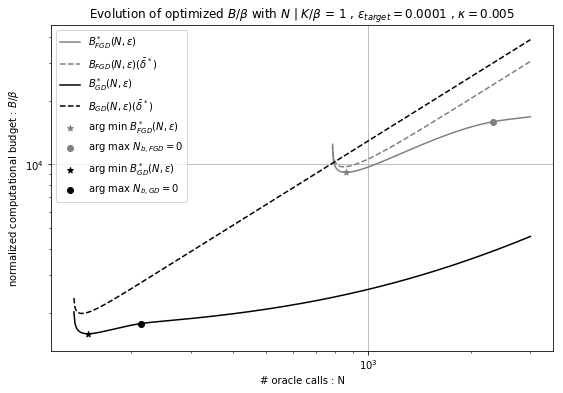

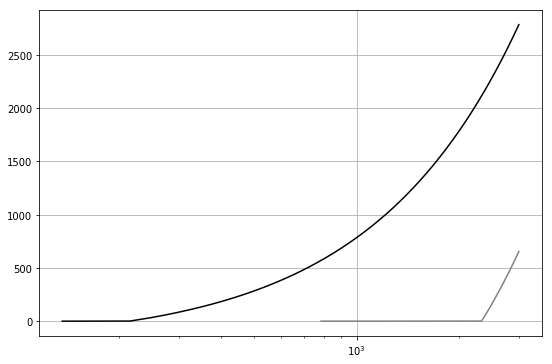

In [10]:
kappa = 0.005
K_div_beta = 1
N_max = 3000 # should be infinity 
multi = 1
eps_target = 1e-4

plt.figure(figsize=(9,6))

plt.grid()

vector_N_attempt = np.arange(N_max)+1

N_echantillon = int(N_max/2)
echantillon_GD = 0
echantillon_GD_constant = 0

v = (1-kappa)
C0 = lambda N: kappa/(1-(1-kappa)**N)
gamma = lambda N: (1-kappa)**N
div = lambda N: (1-(1-kappa)**N)/kappa

gamma_eps = np.array([eps_target - gamma(N_elem)*multi/div(N_elem) for N_elem in vector_N_attempt])
N_min = int(vector_N_attempt[gamma_eps>0][0])
print(N_min)
print(v**N_min)

vector_N_2 = np.arange(N_min,N_max)

vals = [(np.ceil(N_elem-np.real(lambertw(((1-v)/C0(N_elem)*(eps_target-gamma(N_elem)*multi/div(N_elem)) + v**N_elem)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) , N_elem) for N_elem in vector_N_2]
vals_threshold = np.array([np.max((0,np.min((Nb_elem[1],Nb_elem[0])))) for Nb_elem in vals])

B_list = []
Nb_list_GD = []
B_list_constant = []
bar_delta_list = []
cond = True
value_pre_switch = np.inf
N_pre_switch = 0

for index_N in np.arange(len(vector_N_2)):
    
    N = vector_N_2[index_N]
    Nb = int(vals_threshold[index_N])
    Nb_list_GD.append(Nb)
    k = np.arange(int(N))
    k_prime = np.arange(Nb,int(N))
    C = ((eps_target-gamma(N)*multi/div(N)) - (C0(N)*(v**(N-Nb)-v**N))/(1-v))/(N-Nb)
    delta_sched = np.concatenate((np.ones(Nb),C/C0(N)*v**(-(N-1-k_prime))),axis=0)
    value = N*K_div_beta - np.sum(np.log(delta_sched))
    B_list.append(value)
    bar_delta = np.min((1,(eps_target-gamma(N)*multi/div(N))*(1-v)/(C0(N)*(1-v**N))))
    bar_delta_list.append(bar_delta)
    if Nb>0 and cond:
        N_pre_switch = N-1
        cond = False
        value_pre_switch = B_list[-2]
    value_constant = N*K_div_beta-N*np.log(bar_delta)
    B_list_constant.append(value_constant)
    if N==N_echantillon:
        echantillon_GD = value
        echantillon_GD_constant = value_constant
    
N_best = vector_N_2[np.argmin(np.array(B_list))]
plt.loglog(vector_N_2,np.array(B_list),color='gray')
plt.loglog(vector_N_2,np.array(B_list_constant),color='gray',linestyle='--');
plt.scatter([N_best],[np.min(np.array(B_list))],color='gray',marker='*')
plt.scatter([N_pre_switch],[value_pre_switch],color='gray',marker='o');
best_GD = np.min(np.array(B_list))
best_GD_constant = np.min(B_list_constant)
print('slack at '+str(N_echantillon)+' | val = '+str(echantillon_GD_constant-echantillon_GD))
print(N_pre_switch)
print('best GD: '+str(best_GD)+' at '+str(N_best))
print('best GD constant: '+str(best_GD_constant))
print(' ')
print('q-measure: '+str(best_GD_constant-best_GD))
print('relative q-measure: '+str(100*(1-best_GD/best_GD_constant))+' %')
print(' ')
                 
v = 1/(1+np.sqrt(kappa))
C0 = lambda N: 1
gamma = lambda N: 1
div = lambda N: (1+np.sqrt(kappa))**(N-1)

gamma_eps = np.array([eps_target - gamma(N_elem)*multi/div(N_elem) for N_elem in vector_N_attempt])
N_min = int(vector_N_attempt[gamma_eps>0][0])
print(N_min)
print(v**N_min)

vector_N = np.arange(N_min,N_max)

vals = [(np.ceil(N_elem-np.real(lambertw(((1-v)/C0(N_elem)*(eps_target-gamma(N_elem)*multi/div(N_elem)) + v**N_elem)\
             *v**(1/(1-v))*(np.log(v)/(1-v)),-1))/np.log(v)+v/(1-v)) , N_elem) for N_elem in vector_N]
vals_threshold = np.array([np.max((0,np.min((Nb_elem[1],Nb_elem[0])))) for Nb_elem in vals])

B_list = []
Nb_list_FGD = []
B_list_constant = []
bar_delta_list = []
cond = True
value_pre_switch = np.inf
N_pre_switch = 0

N_echantillon = int(200)
echantillon_FGD = 0
echantillon_FGD_constant = 0

for index_N in np.arange(len(vector_N)):
    
    N = vector_N[index_N]
    Nb = int(vals_threshold[index_N])
    Nb_list_FGD.append(Nb)
    k = np.arange(int(N))
    k_prime = np.arange(Nb,int(N))
    C = ((eps_target-gamma(N)*multi/div(N)) - (C0(N)*(v**(N-Nb)-v**N))/(1-v))/(N-Nb)
    delta_sched = np.concatenate((np.ones(Nb),C/C0(N)*v**(-(N-1-k_prime))),axis=0)
    value = N*K_div_beta - np.sum(np.log(delta_sched))
    B_list.append(value)
    bar_delta = np.min((1,(eps_target-gamma(N)*multi/div(N))*(1-v)/(C0(N)*(1-v**N))))
    bar_delta_list.append(bar_delta)
    if Nb>0 and cond:
        N_pre_switch = N-1
        cond = False
        value_pre_switch = B_list[-2]
    value_constant = N*K_div_beta-N*np.log(bar_delta)
    B_list_constant.append(value_constant)
    if N==N_echantillon:
        echantillon_FGD = value
        echantillon_FGD_constant = value_constant
    
N_best = vector_N[np.argmin(np.array(B_list))]
plt.loglog(vector_N,np.array(B_list),color='black')
plt.loglog(vector_N,np.array(B_list_constant),color='black',linestyle='--');
plt.scatter([N_best],[np.min(np.array(B_list))],color='black',marker='*')
plt.scatter([N_pre_switch],[value_pre_switch],color='black',marker='o');
best_FGD = np.min(np.array(B_list))
best_FGD_constant = np.min(B_list_constant)
print('slack at '+str(N_echantillon)+' | val = '+str(echantillon_FGD_constant-echantillon_FGD))
print(N_pre_switch)
print('best FGD: '+str(best_FGD)+' at '+str(N_best))
print('best FGD constant: '+str(best_FGD_constant))
print(' ')
print('q-measure: '+str(best_FGD_constant-best_FGD))
print('relative q-measure: '+str(100*(1-best_FGD/best_FGD_constant))+' %')
print(' ')


plt.title('Evolution of optimized $B / $'+r'$\beta$'+' with $N$ | $K / $'+r'$\beta$ = '+str(K_div_beta)+' , $\epsilon_{target} = $'+str(eps_target)+' , $\kappa = $'+str(kappa))
plt.xlabel('# oracle calls : N')
plt.ylabel('normalized computational budget : $B / $'+r'$\beta$')
plt.legend(['$B_{FGD}^*(N,\epsilon)$','$B_{FGD}(N,\epsilon)'+r'(\bar{\delta}^*)$','$B_{GD}^*(N,\epsilon)$','$B_{GD}(N,\epsilon)'+r'(\bar{\delta}^*)$',\
            'arg min $B^*_{FGD}(N,\epsilon)$','arg max $N_{b,FGD}=0$',\
           'arg min $B^*_{GD}(N,\epsilon)$','arg max $N_{b,GD}=0$']);
plt.savefig('results12_'+'KdivBeta'+str(K_div_beta)+'EpsilonTarget'+str(eps_target)+'kappa'+str(kappa)+'.pdf')

plt.figure(figsize=(9,6))
plt.semilogx(vector_N,Nb_list_FGD,color='black')
plt.semilogx(vector_N_2,Nb_list_GD,color='gray')
plt.grid();